# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [3]:
! git clone https://github.com/ds4e/EDA

fatal: destination path 'EDA' already exists and is not an empty directory.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

PDF of calculations uploaded into my repo.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')


,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


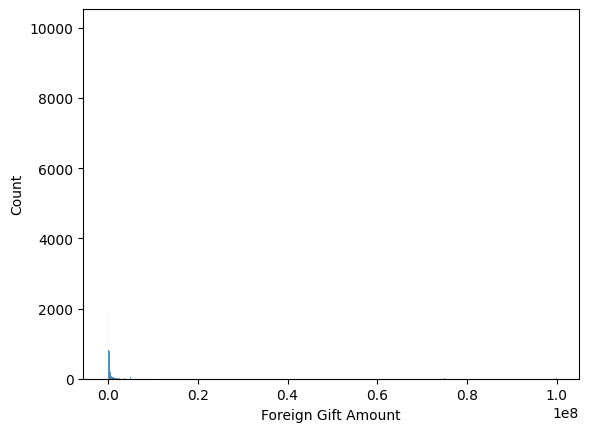

In [12]:
# 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv') # Load dataset

# 2
sns.histplot(df["Foreign Gift Amount"])
df["Foreign Gift Amount"].describe()

The variable has at least one very large outlier, which is making the distribution very skewed right and the histogram not very visually informative. Based on some descriptive statistics of the variable, there also appears to be some negative "gift" values which I find a bit confusing. The maximum value for the variable is 10^8 but the median is around 9.5 * 10^4, so there is a wide range of values for the variable. Based on the 25% and 75% percentiles, most values appear to be in the order of magnitude between 10^3 and 10^5.

In [16]:
# 3
# For `Gift Type`, create a histogram or value counts table.
print(df["Gift Type"].value_counts())

# What proportion of the gifts are contracts, real estate, and monetary gifts?
totalGifts = len(df["Gift Type"])
contractGifts = len(df[df["Gift Type"] == "Contract"])
realEstateGifts = len(df[df["Gift Type"] == "Real Estate"])
monetaryGifts = len(df[df["Gift Type"] == "Monetary Gift"])
print(f"Proportion of gifts that are contracts: {contractGifts/totalGifts}")
print(f"Proportion of gifts that are real estate: {realEstateGifts/totalGifts}")
print(f"Proportion of gifts that are monetary gifts: {monetaryGifts/totalGifts}")

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportion of gifts that are contracts: 0.6120973742957372
Proportion of gifts that are real estate: 0.00038978065979235324
Proportion of gifts that are monetary gifts: 0.3875128450444704


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


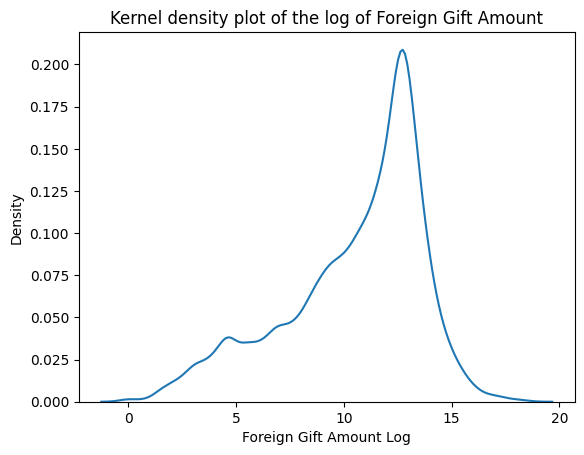

[Text(0.5, 1.0, 'Grouped KDE Plot')]

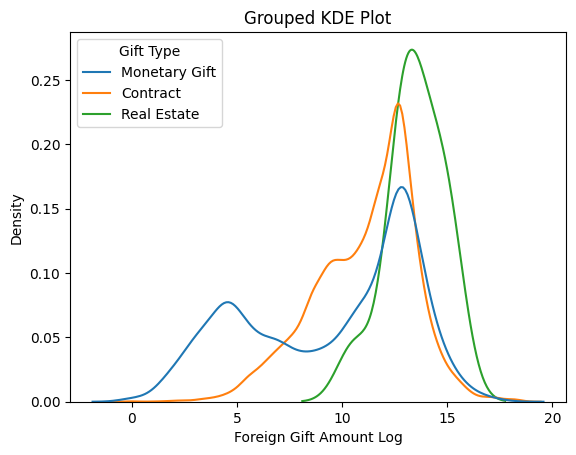

In [32]:
# 4
# Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type.
df["Foreign Gift Amount Log"] = np.log(df["Foreign Gift Amount"])
sns.kdeplot(df["Foreign Gift Amount Log"]).set(title="Kernel density plot of the log of Foreign Gift Amount")
plt.show()

conditioning = 'Gift Type'
var = 'Foreign Gift Amount Log'
sns.kdeplot(data = df, x = var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot')

# Do you notice any patterns?

All three gift types have a peak at a similar gift amount, and a few high values. The distributions do slightly differ, though, and the monetary gift type also has a second peak (like a bimodal distribution) unlike the other two gift types.

In [54]:
# 5
# What are the top 15 countries in terms of the number of gifts?
print("Top 15 countries in terms of the number of gifts")
print(df.groupby("Country of Giftor")["Foreign Gift Amount"].count().sort_values(ascending=False).head(15))

# What are the top 15 countries in terms of the amount given?
print("\n")
print("Top 15 countries in terms of the number of gifts")
print(df.loc[:,["Country of Giftor","Foreign Gift Amount"]].groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))

Top 15 countries in terms of the number of gifts
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


Top 15 countries in terms of the number of gifts
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


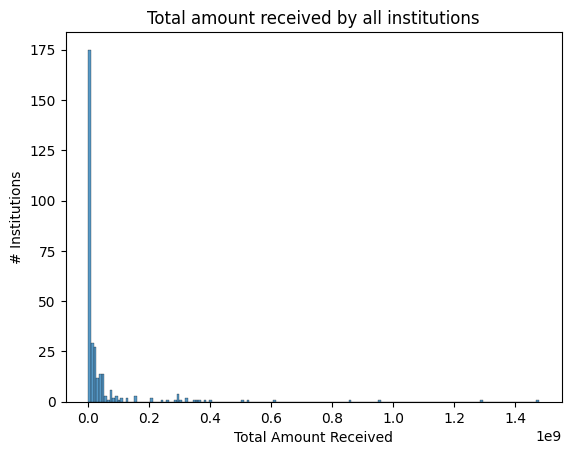

In [60]:
# 6
# What are the top 15 institutions in terms of the total amount of money they receive?
print(df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))

# Make a histogram of the total amount received by all institutions.
sns.histplot(df.groupby("Institution Name")["Foreign Gift Amount"].sum())
plt.xlabel("Total Amount Received")
plt.ylabel("# Institutions")
plt.title("Total amount received by all institutions")
plt.show()

In [62]:
# 7
# Which giftors provide the most money, in total?
print(df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


The Qatar Foundation provides the most money in total.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [63]:
# 1
# Load the `./data/airbnb_hw.csv` data with Pandas.
# This provides a dataset of AirBnB rental properties for New York City.
airbnb = pd.read_csv("/content/EDA/assignment/data/airbnb_hw.csv")

In [68]:
# 2
# What are are the dimensions of the data? How many observations are there?
print("The dimensions of the data are:",airbnb.shape)
print("There are", airbnb.shape[0], "observations")

# What are the variables included?
print("\n")
print("Variables included:",airbnb.columns)

# Use .head() to examine the first few rows of data.
airbnb.head()

The dimensions of the data are: (30478, 13)
There are 30478 observations


Variables included: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [74]:
# 3
# Cross tabulate Room Type and Property Type.
pd.crosstab(airbnb["Room Type"], airbnb["Property Type"])

# What patterns do you see in what kinds of rentals are available?
# A lot of the rentals that are available are houses and lofts.
# Most available room types tend to be private rooms or the entire property.

# For which kinds of properties are private rooms more common than renting the entire property?
# Bed & Breakfast, Castle, Chalet, Dorm, House, Other, Tent, Treehouse


Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


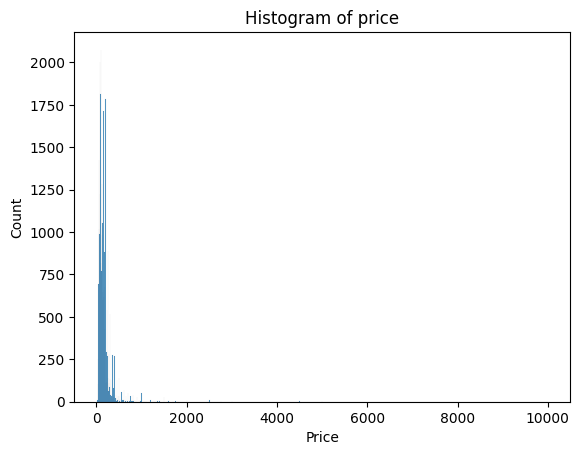

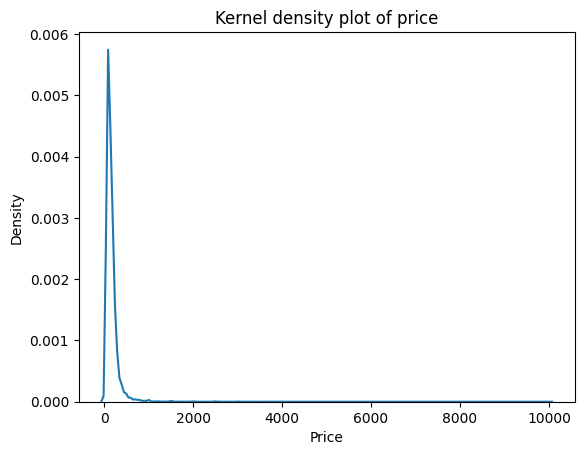

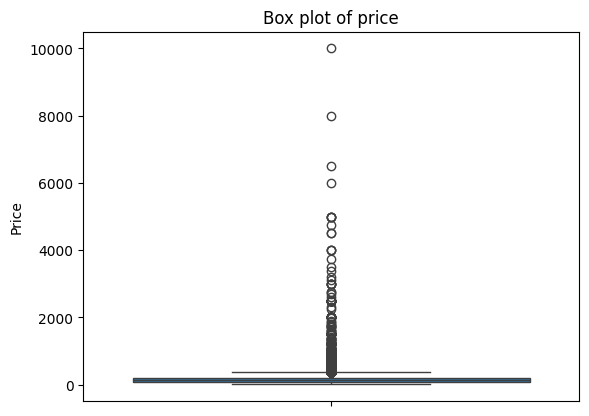



Statistical description
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


In [92]:
# 4
# For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable.
airbnb["Price"].describe() # Being read as an object, need to change
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the Price variable to numeric
airbnb["Price"].describe() # Now being read as number
sns.histplot(airbnb["Price"])
plt.title("Histogram of price")
plt.show()

print("\n")
sns.kdeplot(airbnb["Price"])
plt.title("Kernel density plot of price")
plt.show()

print("\n")
sns.boxplot(airbnb["Price"])
plt.title("Box plot of price")
plt.show()

print("\n")
print("Statistical description")
print(airbnb["Price"].describe())

# Are the data badly scaled? Are there many outliers?

**Are the data badly scaled? Are there many outliers?**

Yes, there are many high outliers. As can be seen by the statistical description, the median value is 125 and the mean is around 163.5897. However, the maxmum value is 10000. This makes the data badly scaled and the graphs hard to interpret visually.

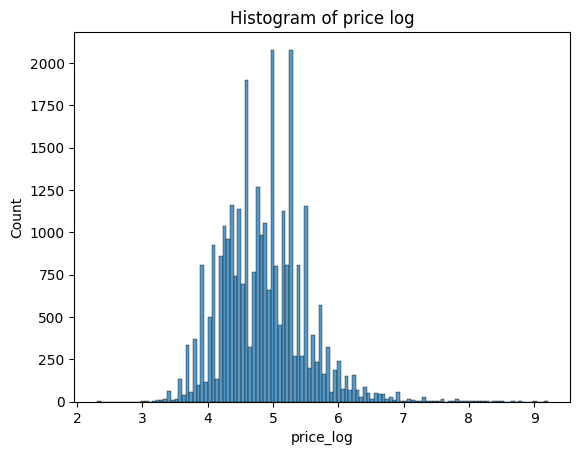

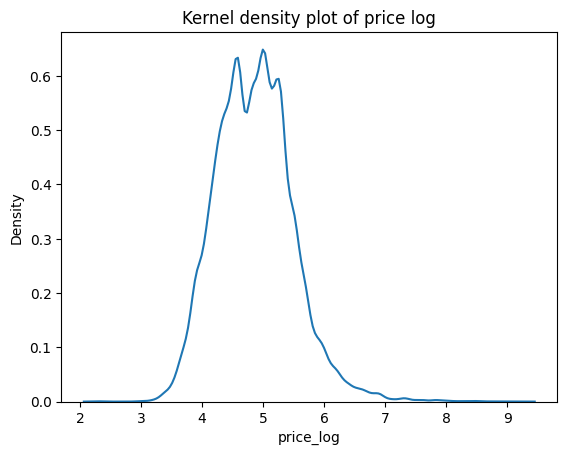

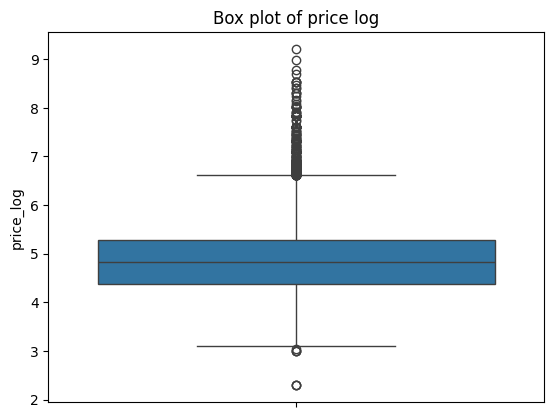



Statistical description
count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


In [93]:
# Use `log` to transform price into a new variable, `price_log`, and take these steps again.
airbnb["price_log"] = np.log(airbnb["Price"])

sns.histplot(airbnb["price_log"])
plt.title("Histogram of price log")
plt.show()

print("\n")
sns.kdeplot(airbnb["price_log"])
plt.title("Kernel density plot of price log")
plt.show()

print("\n")
sns.boxplot(airbnb["price_log"])
plt.title("Box plot of price log")
plt.show()

print("\n")
print("Statistical description")
print(airbnb["price_log"].describe())

# Data is scaled much better!

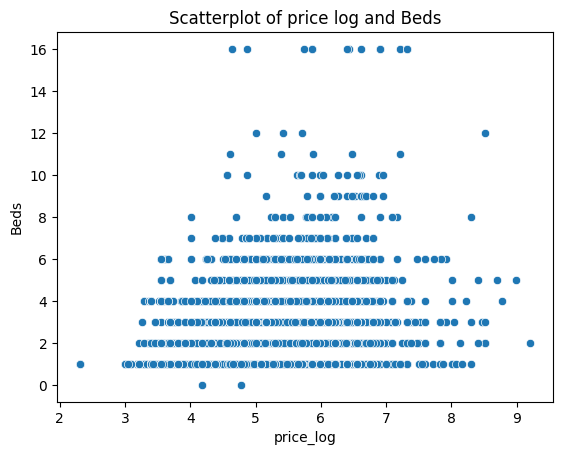

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


In [98]:
# 5
# Make a scatterplot of `price_log` and `Beds`. Describe what you see.
sns.scatterplot(data=airbnb, x="price_log", y="Beds")
plt.title("Scatterplot of price log and Beds")
plt.show()

# The price (log) appears to increase as the number of beds increases.
# Overall, I am surprised to see that there appears to be a wide (and overlapping) price range for all bed number options.

# Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds.
airbnb.groupby("Beds")["Price"].describe()

# Describe any patterns you see in the average price and standard deviation in prices.

In general, the price increases as the number o f bed increases. Interestingly, the average price for 12 bedroom options is much higher than any other bed number option (including 16 bed). This is due to a high outlier. The standard deviation increases slightly as the number of beds increases. For the bed number options with high average prices, the standard deviation tends to be greater (likely due ot high outliers).

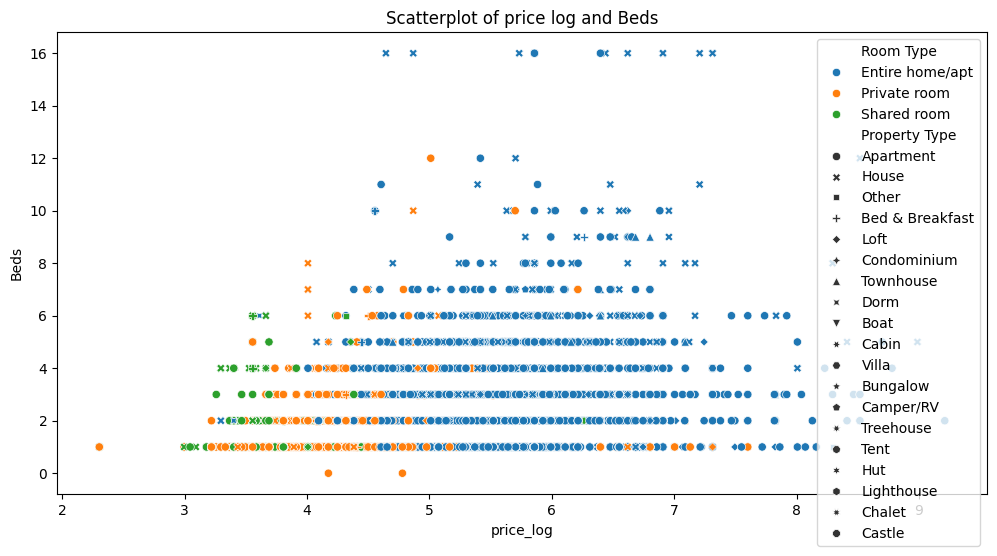

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

In [111]:
# 6
# Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airbnb, x="price_log", y="Beds", hue="Room Type", style="Property Type")
plt.title("Scatterplot of price log and Beds")
plt.show()

# What patterns do you see?
# Shared rooms are the cheapest, then private rooms, then entire properties are the most expensive (generally speaking).
# Homes tend to be the most expensive option. Most of the high outliers in the data set are entire home listing.

# Compute a description of Price conditional on Room Type and Property Type.
print("\n")
airbnb.groupby(["Room Type","Property Type"])["Price"].describe()

# Which Room Type and Property Type have the highest prices on average?
# Entire properties have the highest prices on average.
# Loft, villa, house, and "other" have the highest prices on average.

# Which have the highest standard deviation?
# Other, house, and villa have the highest standard deviation.

# Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
# Given the high outliers and high standard deviation values, the median appears to be a most reliable estimate of central tendency.
# The mean is more easily skewed by outliers, which are common in this dataset.

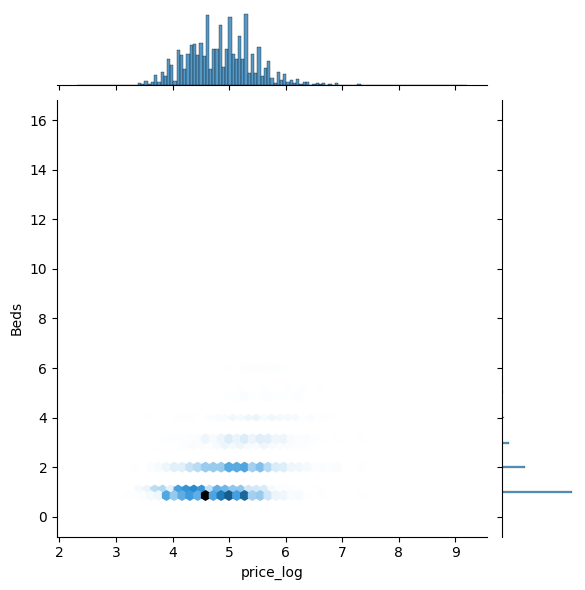

In [118]:
# 7
# We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`.
sns.jointplot(data=airbnb, x="price_log", y="Beds", kind="hex")
plt.show()

**Where are the data actually distributed?**
The data is mostly distributed in the 1-3 bed range. This is very different from the previous plots, which made the data appear distributed across all the bed ranges up till 12-16 beds.

**How does it affect the way you think about the plots in 5 and 6?**
I definitely feel like the plots in 5 and 6 are not visually accurate. They place heavier emphasis on the outliers in the data set and don't show the actual distribution of the data.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.